# Factores del rendimiento estudiantil
El conjunto de datos que se estudia en este analisis proporciona una visión completa de diversos factores que afectan el rendimiento de los estudiantes en los exámenes. Incluye información sobre hábitos de estudio, asistencia, participación de los padres y otros aspectos que influyen en el éxito académico.
Esta compuesto por las siguientes columnas:
* Hours_Studied: Número de horas dedicadas al estudio por semana.
* Attendance: Porcentaje de clases asistidas.
* Parental_Involvement: Nivel de participación de los padres en la educación del estudiante (Bajo, Medio, Alto).
* Access_to_Resources: Disponibilidad de recursos educativos (Bajo, Medio, Alto).
* Extracurricular_Activities: Participación en actividades extracurriculares (Sí, No).
* Sleep_Hours: Número promedio de horas de sueño por noche.
* Previous_Scores: Puntuaciones de exámenes anteriores.
* Motivation_Level: Nivel de motivación del estudiante (Bajo, Medio, Alto).
* Internet_Access: Disponibilidad de acceso a internet (Sí, No).
* Tutoring_Sessions: Número de sesiones de tutoría asistidas por mes.
* Family_Income: Nivel de ingresos familiares (Bajo, Medio, Alto).
* Teacher_Quality: Calidad de los profesores (Bajo, Medio, Alto).
* School_Type: Tipo de escuela a la que asiste (Pública, Privada).
* Peer_Influence: Influencia de los compañeros en el rendimiento académico (Positiva, Neutral, Negativa).
* Physical_Activity: Número promedio de horas de actividad física por semana.
* Learning_Disabilities: Presencia de discapacidades de aprendizaje (Sí, No).
* Parental_Education_Level: Nivel de educación más alto de los padres (Escuela secundaria, Universidad, Posgrado).
* Distance_from_Home: Distancia de la casa a la escuela (Cerca, Moderada, Lejos).
* Gender: Género del estudiante (Masculino, Femenino).
* Exam_Score: Puntuación final del examen.


## Objetivos del analisis de datos
El objetivo de este análisis es examinar los hábitos y recursos disponibles para los estudiantes y analizar cómo estos factores se relacionan con sus resultados en los exámenes. La meta es identificar patrones y tendencias que puedan ofrecer una visión más profunda sobre los elementos que influyen en el rendimiento académico.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import pingouin


In [2]:
student_df = pd.read_csv('Data/StudentPerformanceFactors.csv')

In [3]:
student_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
student_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Limpieza y corrección de datos

In [6]:
null_amount=student_df.isna().sum()
threshold = len(student_df)*0.05
threshold_check=null_amount <= threshold


In [7]:
cols_to_drop = student_df.columns[threshold_check]

In [8]:
student_df.dropna(subset=cols_to_drop, inplace=True)

In [9]:
student_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [10]:
student_df.reset_index(drop=True,inplace=True)
student_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6374,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6375,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6376,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [11]:
cols_with_missing_values = student_df.columns[null_amount > 0]
cols_with_missing_values

Index(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], dtype='object')

In [12]:
#elimino las filas con puntaje mayor a 100
lower = 1
upper = 100
outliers = student_df[(student_df['Exam_Score']<lower)| (student_df['Exam_Score']>upper)].index
student_df = student_df.drop(outliers)


In [13]:
student_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,7.035126,75.063353,1.494747,2.972714,67.246825
std,5.985283,11.549434,1.468091,14.399766,1.233300,1.029006,3.891637
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


In [14]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6377 non-null   int64 
 1   Attendance                  6377 non-null   int64 
 2   Parental_Involvement        6377 non-null   object
 3   Access_to_Resources         6377 non-null   object
 4   Extracurricular_Activities  6377 non-null   object
 5   Sleep_Hours                 6377 non-null   int64 
 6   Previous_Scores             6377 non-null   int64 
 7   Motivation_Level            6377 non-null   object
 8   Internet_Access             6377 non-null   object
 9   Tutoring_Sessions           6377 non-null   int64 
 10  Family_Income               6377 non-null   object
 11  Teacher_Quality             6377 non-null   object
 12  School_Type                 6377 non-null   object
 13  Peer_Influence              6377 non-null   object
 1

In [15]:
columns_to_bool = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
columns_to_string = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 
                     'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Parental_Education_Level', 
                     'Distance_from_Home', 'Gender']
student_df[columns_to_bool] = student_df[columns_to_bool].replace({'Yes': True, 'No': False})
student_df[columns_to_string] = student_df[columns_to_string].astype('string')

C:\Users\elian\AppData\Local\Temp\ipykernel_35632\3126230565.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student_df[columns_to_bool] = student_df[columns_to_bool].replace({'Yes': True, 'No': False})


In [16]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6377 non-null   int64 
 1   Attendance                  6377 non-null   int64 
 2   Parental_Involvement        6377 non-null   string
 3   Access_to_Resources         6377 non-null   string
 4   Extracurricular_Activities  6377 non-null   bool  
 5   Sleep_Hours                 6377 non-null   int64 
 6   Previous_Scores             6377 non-null   int64 
 7   Motivation_Level            6377 non-null   string
 8   Internet_Access             6377 non-null   bool  
 9   Tutoring_Sessions           6377 non-null   int64 
 10  Family_Income               6377 non-null   string
 11  Teacher_Quality             6377 non-null   string
 12  School_Type                 6377 non-null   string
 13  Peer_Influence              6377 non-null   string
 1

### Analisis exploratorio

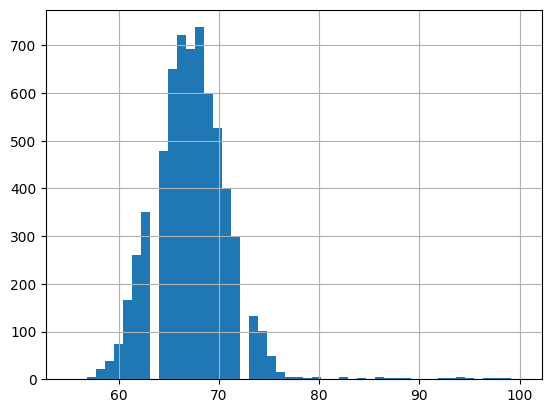

In [17]:
student_df['Exam_Score'].hist(bins=50)
plt.show()

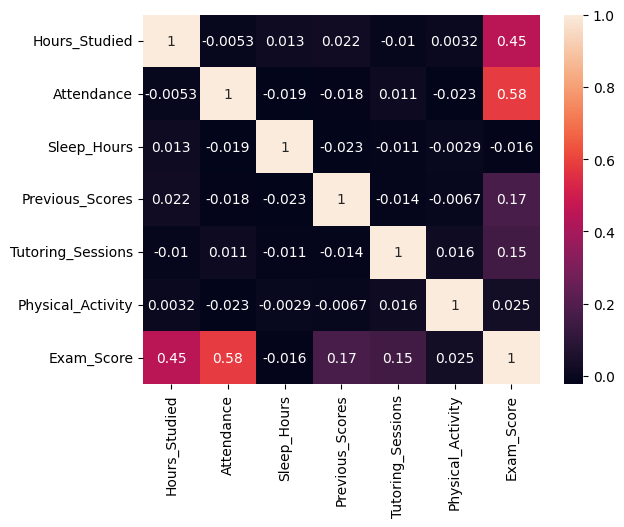

In [18]:
numeric_df = student_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

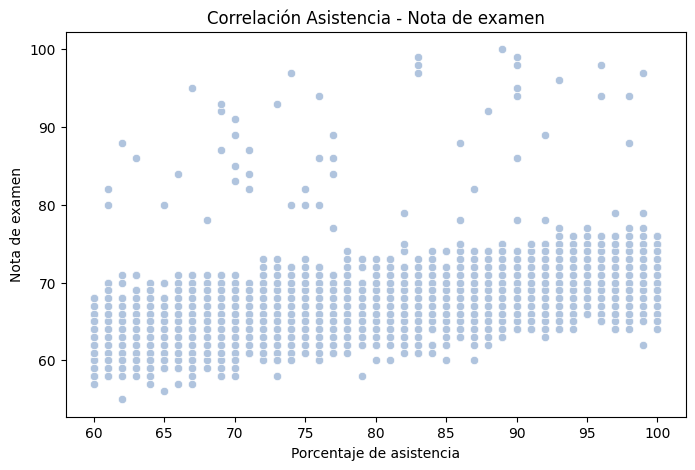

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Attendance', y='Exam_Score', data=student_df, color='lightsteelblue')
plt.title('Correlación Asistencia - Nota de examen', size=12)
plt.xlabel('Porcentaje de asistencia')
plt.ylabel('Nota de examen')
plt.show()

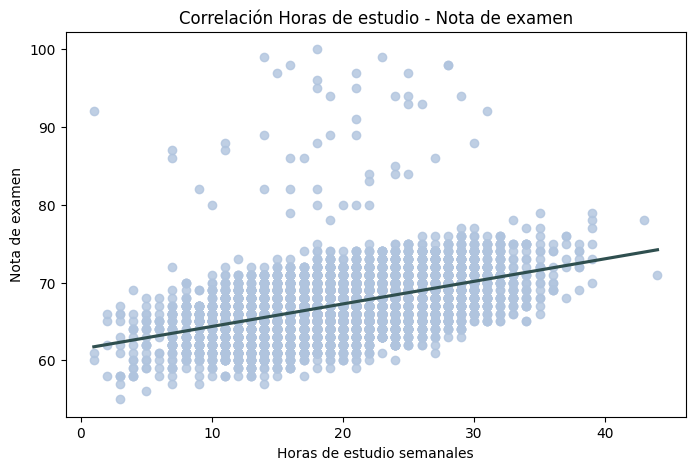

In [20]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Hours_Studied', y='Exam_Score', data=student_df, ci=None, fit_reg=True, color='lightsteelblue',line_kws={'color': 'darkslategrey'})
plt.title('Correlación Horas de estudio - Nota de examen',size=12)
plt.xlabel('Horas de estudio semanales')
plt.ylabel('Nota de examen')
plt.show()

Hay una correlacion positiva entre las horas semanales que los alumnos dedican al estudio, y las clases asistidas con las notas obtenidas por los mismos en el examen.

In [21]:
print(f'La media de las notas es {student_df['Exam_Score'].mean()}')
print(f'La mediana de las notas es {student_df['Exam_Score'].median()}')
print(f'La moda es {statistics.mode(student_df['Exam_Score'])}')

La media de las notas es 67.24682452563901
La mediana de las notas es 67.0
La moda es 68


La cantidad mas representativa de alumnos obtuvo notas que rondan los 67 - 68 puntos

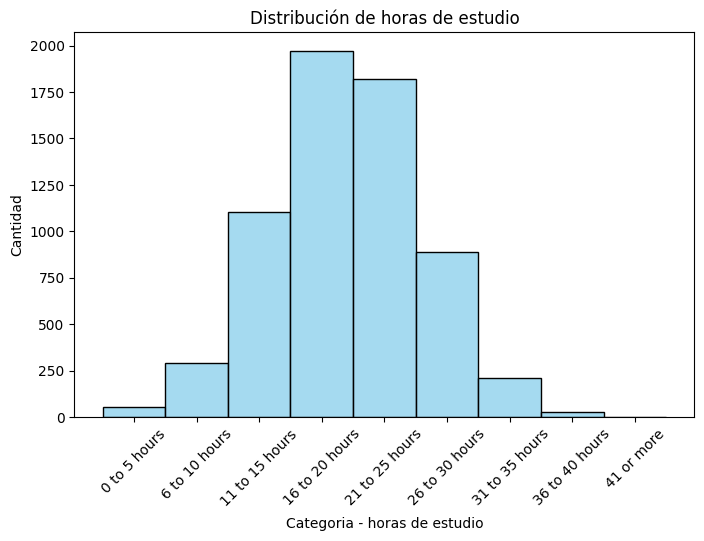

In [22]:
labels = ['0 to 5 hours', '6 to 10 hours', '11 to 15 hours', '16 to 20 hours', '21 to 25 hours', '26 to 30 hours', ' 31 to 35 hours', '36 to 40 hours',\
          '41 or more']

bins = [0,5,10,15,20,25,30,35,40,float('inf')]

student_df['Hours_Studied_Category'] = pd.cut(student_df['Hours_Studied'], labels=labels, bins=bins)
plt.figure(figsize=(8, 5))
sns.histplot(data=student_df, x='Hours_Studied_Category', color='skyblue')
plt.title('Distribución de horas de estudio', size= 12)
plt.xlabel('Categoria - horas de estudio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [23]:
student_df['Hours_Studied_Category'].value_counts()

Hours_Studied_Category
16 to 20 hours     1973
21 to 25 hours     1819
11 to 15 hours     1102
26 to 30 hours      890
6 to 10 hours       293
 31 to 35 hours     213
0 to 5 hours         56
36 to 40 hours       29
41 or more            2
Name: count, dtype: int64

In [24]:
average_scores = student_df.groupby('Hours_Studied_Category')['Exam_Score'].mean().reset_index()
average_scores

C:\Users\elian\AppData\Local\Temp\ipykernel_35632\4062867199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_scores = student_df.groupby('Hours_Studied_Category')['Exam_Score'].mean().reset_index()


,Hours_Studied_Category,Exam_Score
0,0 to 5 hours,62.678571
1,6 to 10 hours,64.197952
2,11 to 15 hours,65.215064
3,16 to 20 hours,66.728332
4,21 to 25 hours,68.042881
5,26 to 30 hours,69.541573
6,31 to 35 hours,70.732394
7,36 to 40 hours,72.896552
8,41 or more,74.500000


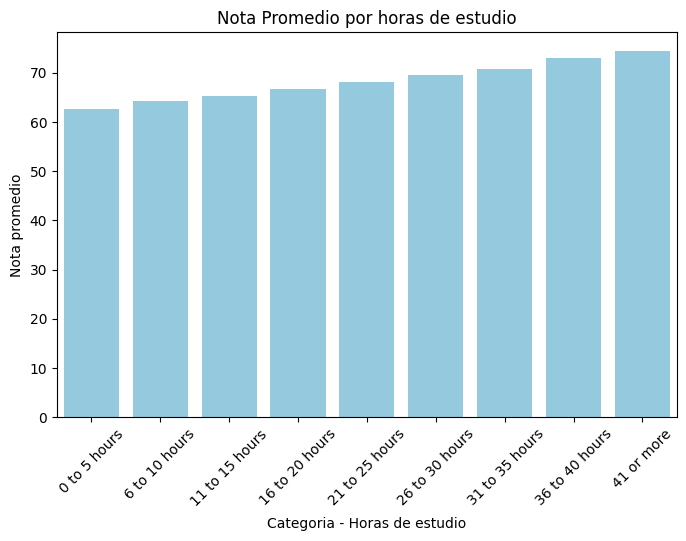

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(data=average_scores, x='Hours_Studied_Category', y='Exam_Score', color='skyblue')
plt.title('Nota Promedio por horas de estudio', size = 12)
plt.xlabel('Categoria - Horas de estudio')
plt.ylabel('Nota promedio')
plt.xticks(rotation=45)
plt.show()

Se reafirma la correlación positiva que existe entre las horas de estudio y la nota promedio de cada grupo. Además, la mayoría de los alumnos estudia entre 16 y 20 horas semanales.

In [26]:
#Analisis de excepciones: Estudiantes con notas altas pero pocas horas de estudio, y viceversa
q25_study = student_df['Hours_Studied'].quantile(0.25)
q75_study = student_df['Hours_Studied'].quantile(0.75)
q25_score = student_df['Exam_Score'].quantile(0.25)
q75_score = student_df['Exam_Score'].quantile(0.75)
high_study_low_score = student_df[(student_df['Hours_Studied'] > q75_study) & (student_df['Exam_Score'] < q25_score)]
low_study_high_score = student_df[(student_df['Hours_Studied']< q25_study) & (student_df['Exam_Score']> q75_score)]

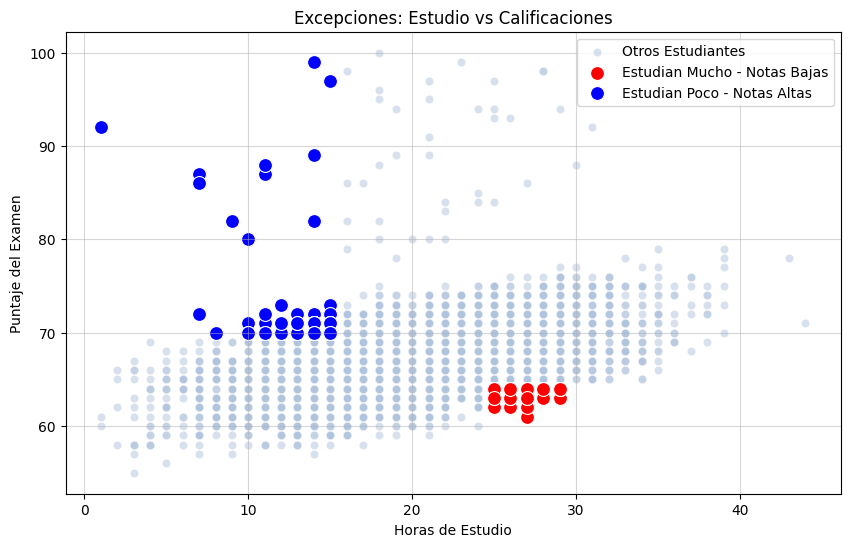

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Hours_Studied', 
    y='Exam_Score', 
    data=student_df, 
    alpha=0.5,
    color='lightsteelblue',
    label='Otros Estudiantes'
)
sns.scatterplot(
    x=high_study_low_score['Hours_Studied'], 
    y=high_study_low_score['Exam_Score'], 
    color='red', 
    label='Estudian Mucho - Notas Bajas', 
    s=100
)
sns.scatterplot(
    x=low_study_high_score['Hours_Studied'], 
    y=low_study_high_score['Exam_Score'], 
    color='blue', 
    label='Estudian Poco - Notas Altas', 
    s=100
)
plt.title('Excepciones: Estudio vs Calificaciones', size=12)
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje del Examen')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

Análisis de la exepción: Muchas horas de estudio - notas bajas

In [28]:
print(high_study_low_score)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
46               26          61               Medium                 Low   
90               26          70               Medium                 Low   
309              25          69                  Low                High   
454              25          63                 High              Medium   
524              26          65                  Low              Medium   
564              27          63               Medium                High   
582              25          70                  Low              Medium   
656              26          61                  Low              Medium   
690              27          72               Medium                 Low   
969              25          60               Medium                 Low   
1054             25          64               Medium                 Low   
1109             26          64                  Low                High   
1135        

0.21


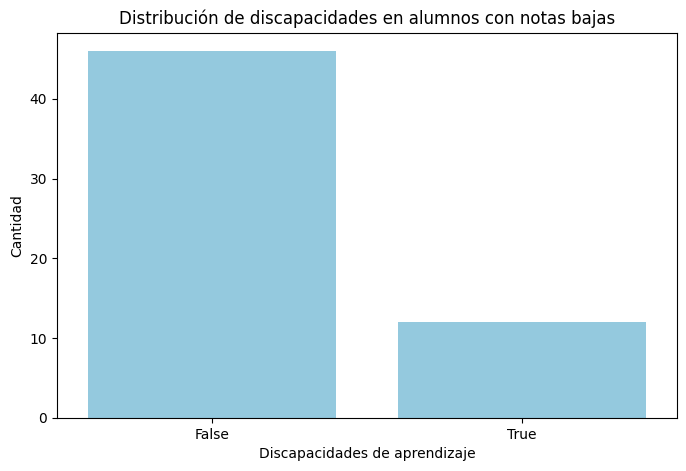

Learning_Disabilities
False    0.793103
True     0.206897
Name: proportion, dtype: float64


In [29]:
high_study_disabilities_mean = high_study_low_score['Learning_Disabilities'].mean().round(2)
print(high_study_disabilities_mean)
plt.figure(figsize=(8, 5))
sns.countplot(x='Learning_Disabilities', data=high_study_low_score, color='skyblue')
plt.title('Distribución de discapacidades en alumnos con notas bajas',size=12)
plt.ylabel('Cantidad')
plt.xlabel('Discapacidades de aprendizaje')
plt.show()
print(high_study_low_score['Learning_Disabilities'].value_counts(normalize=True))

In [30]:
high_study_low_score['Internet_Access'].value_counts(normalize=True)

Internet_Access
True     0.896552
False    0.103448
Name: proportion, dtype: float64

In [31]:
students_attendance_mean = student_df['Attendance'].mean().round(2)
students_tutoring_mean = student_df['Tutoring_Sessions'].mean().round(2)

In [32]:
high_study_attendance_mean=high_study_low_score['Attendance'].mean().round(2)
high_study_tutoring_mean = high_study_low_score['Tutoring_Sessions'].mean().round(2)

In [33]:
print(f'Media asistencia: {students_attendance_mean}, alumnos con bajas notas y más estudio: {high_study_attendance_mean}')
print(f'Media tutorías: {students_tutoring_mean}, alumnos con bajas notas y más estudio: {high_study_tutoring_mean}')


Media asistencia: 80.02, alumnos con bajas notas y más estudio: 64.55
Media tutorías: 1.49, alumnos con bajas notas y más estudio: 0.88


Análisis de la exepción: Pocas horas de estudio - notas altas

In [34]:
low_study_high_score

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Hours_Studied_Category
83,15,95,Medium,Medium,False,7,93,Medium,True,2,...,Medium,Public,Positive,4,False,College,Moderate,Male,70,11 to 15 hours
167,15,93,High,Medium,False,6,64,Medium,True,2,...,High,Public,Positive,4,False,Postgraduate,Near,Male,71,11 to 15 hours
420,8,100,High,Medium,True,8,92,Medium,True,1,...,High,Public,Neutral,3,False,Postgraduate,Moderate,Female,70,6 to 10 hours
482,14,89,High,High,True,4,73,Medium,True,2,...,High,Public,Negative,3,False,College,Near,Male,70,11 to 15 hours
515,15,83,Medium,Medium,False,7,97,Medium,True,2,...,High,Private,Neutral,2,False,High School,Near,Female,97,11 to 15 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,11,100,High,High,True,8,58,High,True,1,...,Medium,Private,Positive,3,False,College,Near,Female,70,11 to 15 hours
6234,14,91,Medium,Medium,True,7,95,Medium,True,2,...,High,Public,Positive,2,False,High School,Moderate,Male,70,11 to 15 hours
6265,12,97,High,Low,True,6,96,Medium,True,2,...,High,Public,Positive,2,False,Postgraduate,Near,Female,71,11 to 15 hours
6311,14,97,Medium,Medium,True,7,75,High,True,1,...,Medium,Public,Positive,4,False,College,Near,Female,70,11 to 15 hours


In [35]:
low_study_high_score['Internet_Access'].value_counts(normalize=True)

Internet_Access
True     0.931818
False    0.068182
Name: proportion, dtype: float64

0.056818181818181816


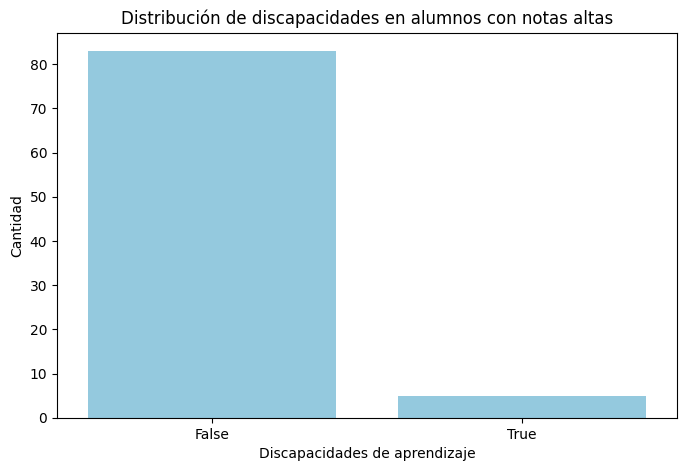

Learning_Disabilities
False    0.943182
True     0.056818
Name: proportion, dtype: float64


In [36]:
low_study_disabilities_mean = low_study_high_score['Learning_Disabilities'].mean()
print(low_study_disabilities_mean)
plt.figure(figsize=(8, 5))
sns.countplot(x='Learning_Disabilities', data=low_study_high_score, color='skyblue')
plt.title('Distribución de discapacidades en alumnos con notas altas',size=12)
plt.ylabel('Cantidad')
plt.xlabel('Discapacidades de aprendizaje')
plt.show()
print(low_study_high_score['Learning_Disabilities'].value_counts(normalize=True))

In [37]:
low_study_attendance_mean=low_study_high_score['Attendance'].mean().round(2)
low_study_tutoring_mean = low_study_high_score['Tutoring_Sessions'].mean().round(2)

In [38]:
print(f'Media asistencia: {students_attendance_mean}, bajas notas y menos estudio: {low_study_attendance_mean}')
print(f'Media tutorías: {students_tutoring_mean}, bajas notas y menos estudio: {low_study_tutoring_mean}')


Media asistencia: 80.02, bajas notas y menos estudio: 92.47
Media tutorías: 1.49, bajas notas y menos estudio: 2.12


Los alumnos con menores horas de estudio pero mejores notas tienen, en promedio, mayor asistencia a clases y mayor participación en tutorías en comparación con la media del total de los alumnos. En el extremo opuesto se encuentran aquellos alumnos que dedican más horas de estudio y obtienen notas más bajas, con promedios por debajo de la media general y también del otro grupo con el que se compara.

Es importante destacar que el grupo con mejores notas presenta un porcentaje mayor de alumnos con acceso a internet y un porcentaje menor de alumnos con discapacidades de aprendizaje en relación con el otro grupo.

A continuacion se probara la siguiente hipótesis:
- H₀ (Hipótesis nula): La media de horas de sueño del grupo que estudia mucho y obtiene bajas notas es igual a la media de horas de sueño del grupo que estudia poco y obtiene altas notas. Por lo tanto, las horas de sueño no son un factor determinante del desempeño.
- H₁ (Hipótesis alternativa): Las medias de horas de sueño de los dos grupos son diferentes, lo que sugiere que las horas de sueño podrían estar relacionadas con el desempeño académico.

In [39]:
#Prueba de hipótesis a traves del T-Test de muestras independientes
alpha = 0.05
group_high_study_low_score = high_study_low_score['Sleep_Hours']
group_low_study_high_score = low_study_high_score['Sleep_Hours']


In [40]:
ttest_results = pingouin.ttest(group_high_study_low_score, group_low_study_high_score, correction=True)
print(ttest_results)

               T         dof alternative     p-val          CI95%   cohen-d  \
T-test -0.292948  115.611708   two-sided  0.770087  [-0.56, 0.41]  0.050322   

         BF10     power  
T-test  0.189  0.060066  


In [41]:
p_value = ttest_results['p-val'].iloc[0]
p_value

np.float64(0.7700874309908503)

In [42]:
if p_value < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

No se rechaza la hipótesis nula


Análisis de otras variables

Gender
Male      0.578328
Female    0.421672
Name: proportion, dtype: Float64
Gender
Female    67.262179
Male      67.235629
Name: Exam_Score, dtype: float64


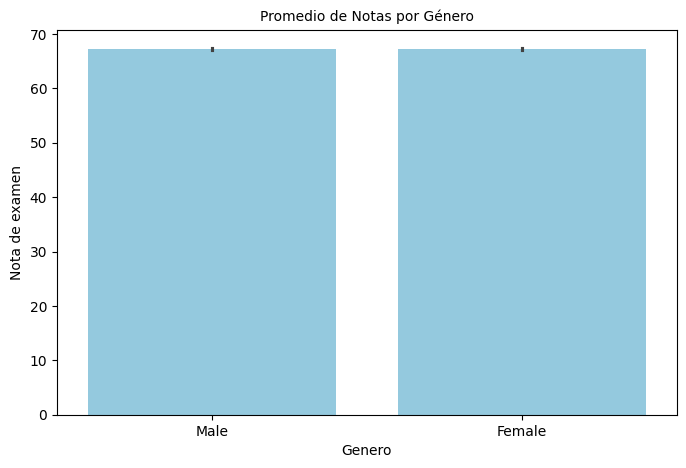

In [43]:
print(student_df['Gender'].value_counts(normalize=True))
print(student_df.groupby('Gender')['Exam_Score'].mean())
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Exam_Score', data=student_df, color='skyblue')
plt.title('Promedio de Notas por Género', size=10)
plt.ylabel('Nota de examen')
plt.xlabel('Genero')
plt.show()

In [44]:
student_df.groupby('School_Type')['Exam_Score'].mean()

School_Type
Private    67.316358
Public     67.216332
Name: Exam_Score, dtype: float64

In [45]:
student_private_school = student_df[student_df['School_Type']=='Private']
student_private_school['Family_Income'].value_counts(normalize=True)

Family_Income
Low       0.413066
Medium    0.399177
High      0.187757
Name: proportion, dtype: Float64

In [46]:
student_public_school = student_df[student_df['School_Type']=='Public']
student_public_school['Family_Income'].value_counts(normalize=True)

Family_Income
Medium     0.40379
Low       0.401308
High      0.194902
Name: proportion, dtype: Float64

El promedio de notas obtenidas no varía considerablemente según el género de los alumnos ni el tipo de escuela a la que asisten. Tanto en escuelas públicas como privadas, predominan las familias de ingresos bajos y medios, representando aproximadamente el 40% cada uno para ambos tipos de escuela, mientras que las familias con ingresos altos representan menos del 20%.

In [47]:
student_df.groupby('Parental_Involvement').count()

,Hours_Studied,Attendance,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Hours_Studied_Category
Parental_Involvement,,,,,,,,,,,,,,,,,,,,
High,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
Low,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290
Medium,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251


In [48]:
student_df.groupby('Parental_Involvement')['Exam_Score'].mean()

Parental_Involvement
High      68.112200
Low       66.351938
Medium    67.113196
Name: Exam_Score, dtype: float64

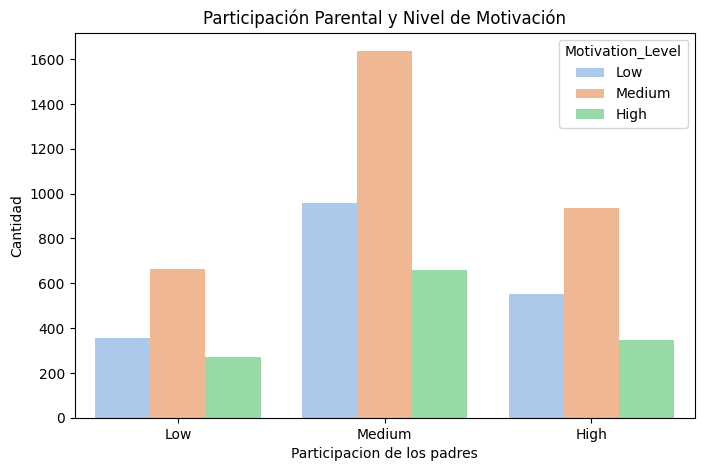

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Parental_Involvement', hue='Motivation_Level', data=student_df, palette='pastel')
plt.title("Participación Parental y Nivel de Motivación")
plt.ylabel('Cantidad')
plt.xlabel('Participacion de los padres')
plt.show()

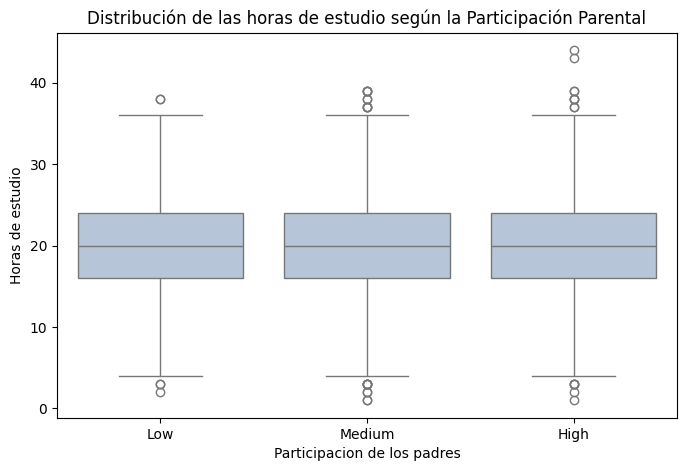

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Parental_Involvement', y='Hours_Studied', data=student_df, color='lightsteelblue')
plt.title("Distribución de las horas de estudio según la Participación Parental")
plt.ylabel('Horas de estudio')
plt.xlabel('Participacion de los padres')
plt.show()

## **Conclusiones**
El análisis exploratorio revela que el promedio de notas de los estudiantes se sitúa en torno a 67 puntos. A continuación, se detallan los principales factores analizados y su incidencia en las calificaciones:
### **Factores clave analizados**
* **Porcentaje de asistencia:** Existe una correlación positiva entre la asistencia y las notas. Los estudiantes con mayor porcentaje de asistencia tienden a obtener mejores calificaciones.
* **Horas de estudio semanales:** También se observa una correlación positiva. Los estudiantes que dedican más horas al estudio semanalmente obtienen mejores resultados. La mayoría dedica entre 16 y 20 horas semanales al estudio.
* **Genero:** El 58% de los estudiantes son hombres y el 42% son mujeres. Sin embargo, el género no influye en las calificaciones, ya que ambos grupos tienen un promedio de alrededor de 67.3 puntos.
* **Tipo de escuela e ingresos familiares:** Las calificaciones promedio son similares entre estudiantes de escuelas públicas y privadas (aproximadamente 67.3 puntos). Además, tanto en escuelas públicas como privadas predominan las familias de ingresos bajos y medios (alrededor del 40% para cada grupo), mientras que las familias de ingresos altos representan menos del 20%
* **Participacion de los padres:** Un mayor nivel de participación parental se asocia con mejores calificaciones. Los estudiantes con alta participación parental suelen superar la media en sus notas y dedican más horas al estudio. En este grupo, se observan excepciones donde algunos estudiantes dedican más horas de lo habitual al estudio.
* **Nivel de Motivacion:** Los estudiantes con motivación media conforman el grupo mayoritario, seguidos por aquellos con motivación baja y finalmente los con motivación alta. Esto sugiere que solo una pequeña parte de los estudiantes se siente altamente motivada hacia el aprendizaje y la escuela..

### **Excepciones:**
1. **Alumnos con muchas horas de estudio pero notas bajas:**
Este grupo presenta un desempeño por debajo de la media, tanto en comparación con el total de estudiantes como con el otro grupo excepcional.
2. **Alumnos con pocas horas de estudio pero notas altas:** 
Este grupo, por el contrario, se caracteriza por:
* **Mayor asistencia a clases.**  
* **Mayor participación en tutorías.**  
* **Un porcentaje más alto de estudiantes con acceso a internet.**  
* **Menor porcentaje de alumnos con discapacidades de aprendizaje.**

### **Impacto de las horas de sueño en las excepciones**
La prueba de hipótesis realizada indica que las **horas de sueño no tienen un impacto significativo** en las calificaciones de estos grupos excepcionales.

### **Observaciones finales**
Este análisis destaca la importancia de factores como la asistencia, la participación de los padres y el acceso a recursos educativos en el desempeño académico. Por otro lado las horas de sueño parecen tener un impacto menos directo en las calificaciones. Las excepciones observadas ofrecen valiosas oportunidades para profundizar en los factores individuales que influyen en el aprendizaje.

